# Equação linear em um espaço bidimensional

Uma equação linear é definida por:
    
    ax + by + c = 0

Dessa forma, conseguimos gerar uma linha no gráfico dados os valores de a, b e c:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

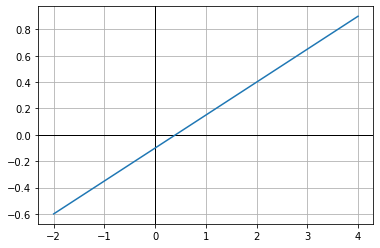

In [2]:
a = -1
b = 4
c = 0.4

x = np.linspace(-2, 4, 50)
y = (-a*x - c)/b # ax + by + c = 0

plt.axvline(0, -1, 1, color='k', linewidth=1)
plt.axhline(0, -2, 4, color='k', linewidth=1)
plt.plot(x, y)
plt.grid(True)

Se um valor estiver em cima da linha, o retorno será 0;
Se um valor estiver acima da linha, o retorno será positivo;
se um valor estiver abaixo da linha, o retorno será negativo.

In [3]:
ponto1 = (2, 0.4)
retorno_ponto1 = a * ponto1[0] + b * ponto1[1] + c
print('Ponto 1: %.2f' % retorno_ponto1) # Sob a reta

ponto2 = (1, -0.2)
retorno_ponto2 = a * ponto2[0] + b * ponto2[1] + c
print('Ponto 2: %.2f' % retorno_ponto2) # abaixo da reta

ponto3 = (-1, 0.2)
retorno_ponto3 = a * ponto3[0] + b * ponto3[1] + c
print('Ponto 3: %.2f' % retorno_ponto3) # acima a reta

Ponto 1: 0.00
Ponto 2: -1.40
Ponto 3: 2.20


Marcando os pontos no gráfico:

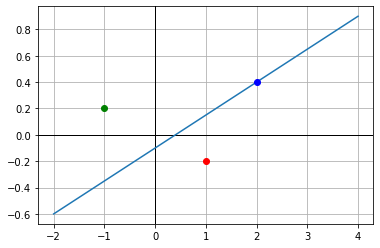

In [4]:
plt.axvline(0, -1, 1, color='k', linewidth=1)
plt.axhline(0, -2, 4, color='k', linewidth=1)
plt.plot(x, y)
plt.grid(True)

plt.plot(ponto1[0], ponto1[1], color = 'b', marker = 'o')
plt.plot(ponto2[0], ponto2[1], color = 'r', marker = 'o')
plt.plot(ponto3[0], ponto3[1], color = 'g', marker = 'o')

Como podemos ver pelo gráfico, a linha definida pela equação **ax + by + c** pode ser utilizado como um classificador, separando os pontos de cima dos pontos de baixo.

# Perceptron

Da mesma forma, o Perceptron é um classificador linear, dado pela equação:

    w¹x¹ + w²x² + b

Onde: 
 - **w**: É o peso da entrada (weight), similiar aos multiplicadores **a** e **b** da equação linear;
 - **x¹, x²**: São as entradas;
 - **b**: É o viés, similar a constante **c** da equação linear. É esse viés que irá deslocar a linha, sem interferir em sua angulação.

Um perceptron pode ter **n** dimensões, então sua equação completa é:

    w¹x¹ + w²x² + ... wnxn + b

Ou:

    Σ wixi + d

# Exercício

Dadas duas classes de dados, defina a reta que melhor classifica esses dados.

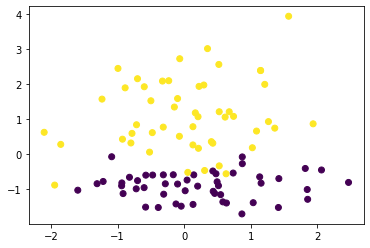

In [62]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

np.random.seed(9876)

# x = dados (x1, x2, etc) ou features, são as coordenadas em um plano.
# y = rótulos (cluster 0 ou 1) ou labels, é a classificação do ponto.
X, Y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)

plt.scatter(X[:,0], X[:,1], marker='o', c=Y)

In [63]:
# Função que plota a linha do nosso modelo dados os pesos e o viés:
def plot_model(pontos, w1, w2, b):
    
    np.random.seed(9876)

    plt.scatter(pontos[:,0], pontos[:,1], marker='o', c=Y, edgecolors='k') ## pontos
    
    x = np.linspace(-3, 4, 50)
    y = (-w1 * x - b) / w2

    plt.axvline(0, -1, 1, color='k', linewidth=1)
    plt.axhline(0, -3, 4, color='k', linewidth=1)
    plt.plot(x, y)
    plt.grid(True)

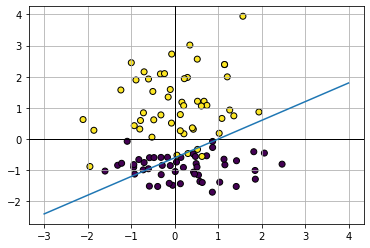

In [64]:
w1 = -3
w2 = 5
b = 3

plot_model(X, w1, w2, b)

Méééééh, tentamos outros valores:

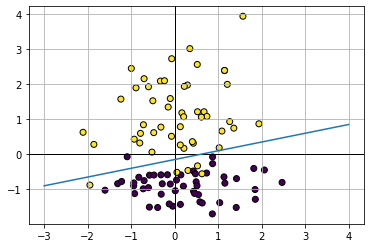

In [66]:
w1 = 1
w2 = -4
b = -0.6

plot_model(X, w1, w2, b)

Parece que os valores w1 = 1, w2 = -4 e b = -0.6 estão bem próximos da melhor combinação para a classificação dos pontos aleatórios dados.

Dessa forma, podemos escrever uma função que irá classificar o ponto dado de acordo com os pesos w1, w2 e o viés b:

In [67]:
def classifica(ponto, w1, w2, b):
    ret = w1 * ponto[0] + w2 * ponto[1] + b

    if ret >= 0:
        return 0, 'purple'
    else:
        return 1, 'yellow'

Classificando um ponto qualquer:

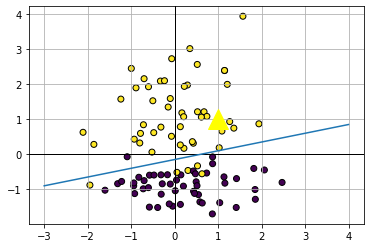

In [68]:
ponto = (1,1)

classe, cor = classifica(ponto, w1, w2, b)
plot_model(X, w1, w2, b)
plt.plot(ponto[0], ponto[1], marker='^', markersize=20, color=cor)

O ponto (1, 1) foi classificado corretamente de acordo com a reta.

Como é um classificador linear, existem diversos pontos que não serão corretamente classificados.

In [69]:
# cálculo da acurácia, compara cada retorno da funcao classifica com
# o valor dado pelo gerador aleatorio:
def acuracia_modelo(pontos, classes, w1, w2, b):
    total = len(pontos)
    acertos = 0
    for p, c in zip(pontos, classes):
        classe, cor = classifica(p, w1, w2, b)
        if classe == c:
            acertos += 1
    return acertos / total

In [70]:
acuracia = acuracia_modelo(X, Y, w1, w2, b)
print("Parâmetros: w1 = %.1f w2 = %.1f b = %.1f" % (w1, w2, b))
print("Acuracia: %.2f%%" % (acuracia*100))

Parâmetros: w1 = 1.0 w2 = -4.0 b = -0.6
Acuracia: 94.00%


# Testando com outros valores

Parâmetros: w1 = 0.6 w2 = -1.0 b = 0.8
Acuracia: 81.00%


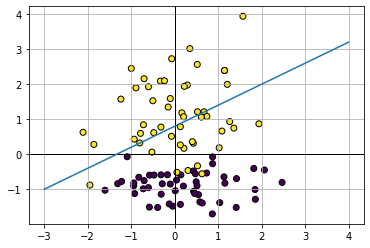

In [71]:
w1 = 0.6
w2 = -1
b = 0.8

plot_model(X, w1, w2, b)

acuracia = acuracia_modelo(X, Y, w1, w2, b)
print("Parâmetros: w1 = %.1f w2 = %.1f b = %.1f" % (w1, w2, b))
print("Acuracia: %.2f%%" % (acuracia*100))